In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [13]:
df=pd.read_csv("./teacher_data.csv") #讀csv
print(df)

      age gender  height  weight attitude  prepare_hours class_type pass_rate  \
0      43      F     180      67  Serious              5   Physical      High   
1      52      M     157      50  Serious              5   Physical      High   
2      36      M     161      42  Serious              3   Physical      High   
3      52      M     162      54  Serious              6   Physical      High   
4      28      M     179      41  Serious              0     Online       Low   
...   ...    ...     ...     ...      ...            ...        ...       ...   
5995   30      M     145      81  Serious              3   Physical      High   
5996   57      F     171      58  Serious              5   Physical      High   
5997   38      F     151      66  Serious              6   Physical      High   
5998   52      F     151      92  Serious              6     Online       Low   
5999   64      M     140     100  Serious              3   Physical      High   

      glasses classhw care 

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["gender"]=label_encoder.fit_transform(df["gender"]) # 對gender做label Encoder
df["attitude"]=label_encoder.fit_transform(df["attitude"]) # 對attitude做label Encoder
df["class_type"]=label_encoder.fit_transform(df["class_type"]) # 對class_type做label Encoder
df["pass_rate"]=label_encoder.fit_transform(df["pass_rate"]) # 對pass_rate做label Encoder
df["classhw"]=label_encoder.fit_transform(df["classhw"]) # 對classhw做label Encoder
df["care"]=label_encoder.fit_transform(df["care"]) # 對care做label Encoder
df["label"]=label_encoder.fit_transform(df["label"]) # 對label做label Encoder
print(df)

      age  gender  height  weight  attitude  prepare_hours  class_type  \
0      43       0     180      67         1              5           1   
1      52       1     157      50         1              5           1   
2      36       1     161      42         1              3           1   
3      52       1     162      54         1              6           1   
4      28       1     179      41         1              0           0   
...   ...     ...     ...     ...       ...            ...         ...   
5995   30       1     145      81         1              3           1   
5996   57       0     171      58         1              5           1   
5997   38       0     151      66         1              6           1   
5998   52       0     151      92         1              6           0   
5999   64       1     140     100         1              3           1   

      pass_rate  glasses  classhw  care  label  
0             0        0        0     1      1  
1            

In [15]:
df=df.dropna()
print("當前資料缺失值總數:",len(np.where(np.isnan(df))[0]))

當前資料缺失值總數: 0


In [16]:
from sklearn.model_selection import train_test_split
X=df.drop(labels=["label"],axis=1).values #沒label
y=df["label"].values #有label
print("X:\n",X)
print("y:\n",y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print("Training data shape:",X_train.shape)
print("Testing data shape:",X_test.shape)

X:
 [[ 43   0 180 ...   0   0   1]
 [ 52   1 157 ...   0   1   1]
 [ 36   1 161 ...   1   0   1]
 ...
 [ 38   0 151 ...   0   2   1]
 [ 52   0 151 ...   0   0   1]
 [ 64   1 140 ...   0   2   1]]
y:
 [1 1 1 ... 1 0 1]
Training data shape: (4500, 11)
Testing data shape: (1500, 11)


分類決策樹
一個決策樹會根據訓練資料自動產生一棵樹。決策樹會根據資料產生很多樹狀的規則，最終訓練出來的規則會對新樣本進行預測。

Parameters:
。criterion: 亂度的評估標準，gini/entropy。預設為gini。
。max_depth: 樹的最大深度。
。splitter: 特徵劃分點選擇標準，best/random。預設為best。
。random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
。min_samples_split: 至少有多少資料才能再分
。min_samples_leaf: 分完至少有多少資料才能分

Attributes:
。feature_importances_: 查詢模型特徵的重要程度。

Methods:
。fit: 放入X、y進行模型擬合。
。predict: 預測並回傳預測類別。
。score: 預測成功的比例。
。predict_proba: 預測每個類別的機率值。
。get_depth: 取得樹的深度。

In [17]:
from sklearn.tree import DecisionTreeClassifier
DecidionTreeModel=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42) #建立模型
DecidionTreeModel.fit(X_train,y_train) #使用訓練資料訓練模型
print("Test set Accuracy:",DecidionTreeModel.score(X_test,y_test)) #使用測試資料預測分類，並印出準確率
print("Train set Accuracy:",DecidionTreeModel.score(X_train,y_train)) #使用訓練資料預測分類，並印出準確率

Test set Accuracy: 1.0
Train set Accuracy: 1.0


In [18]:
print('特徵重要程度: ',DecidionTreeModel.feature_importances_)

特徵重要程度:  [0.         0.         0.         0.         0.28852774 0.04443353
 0.36432398 0.19989458 0.         0.         0.10282016]


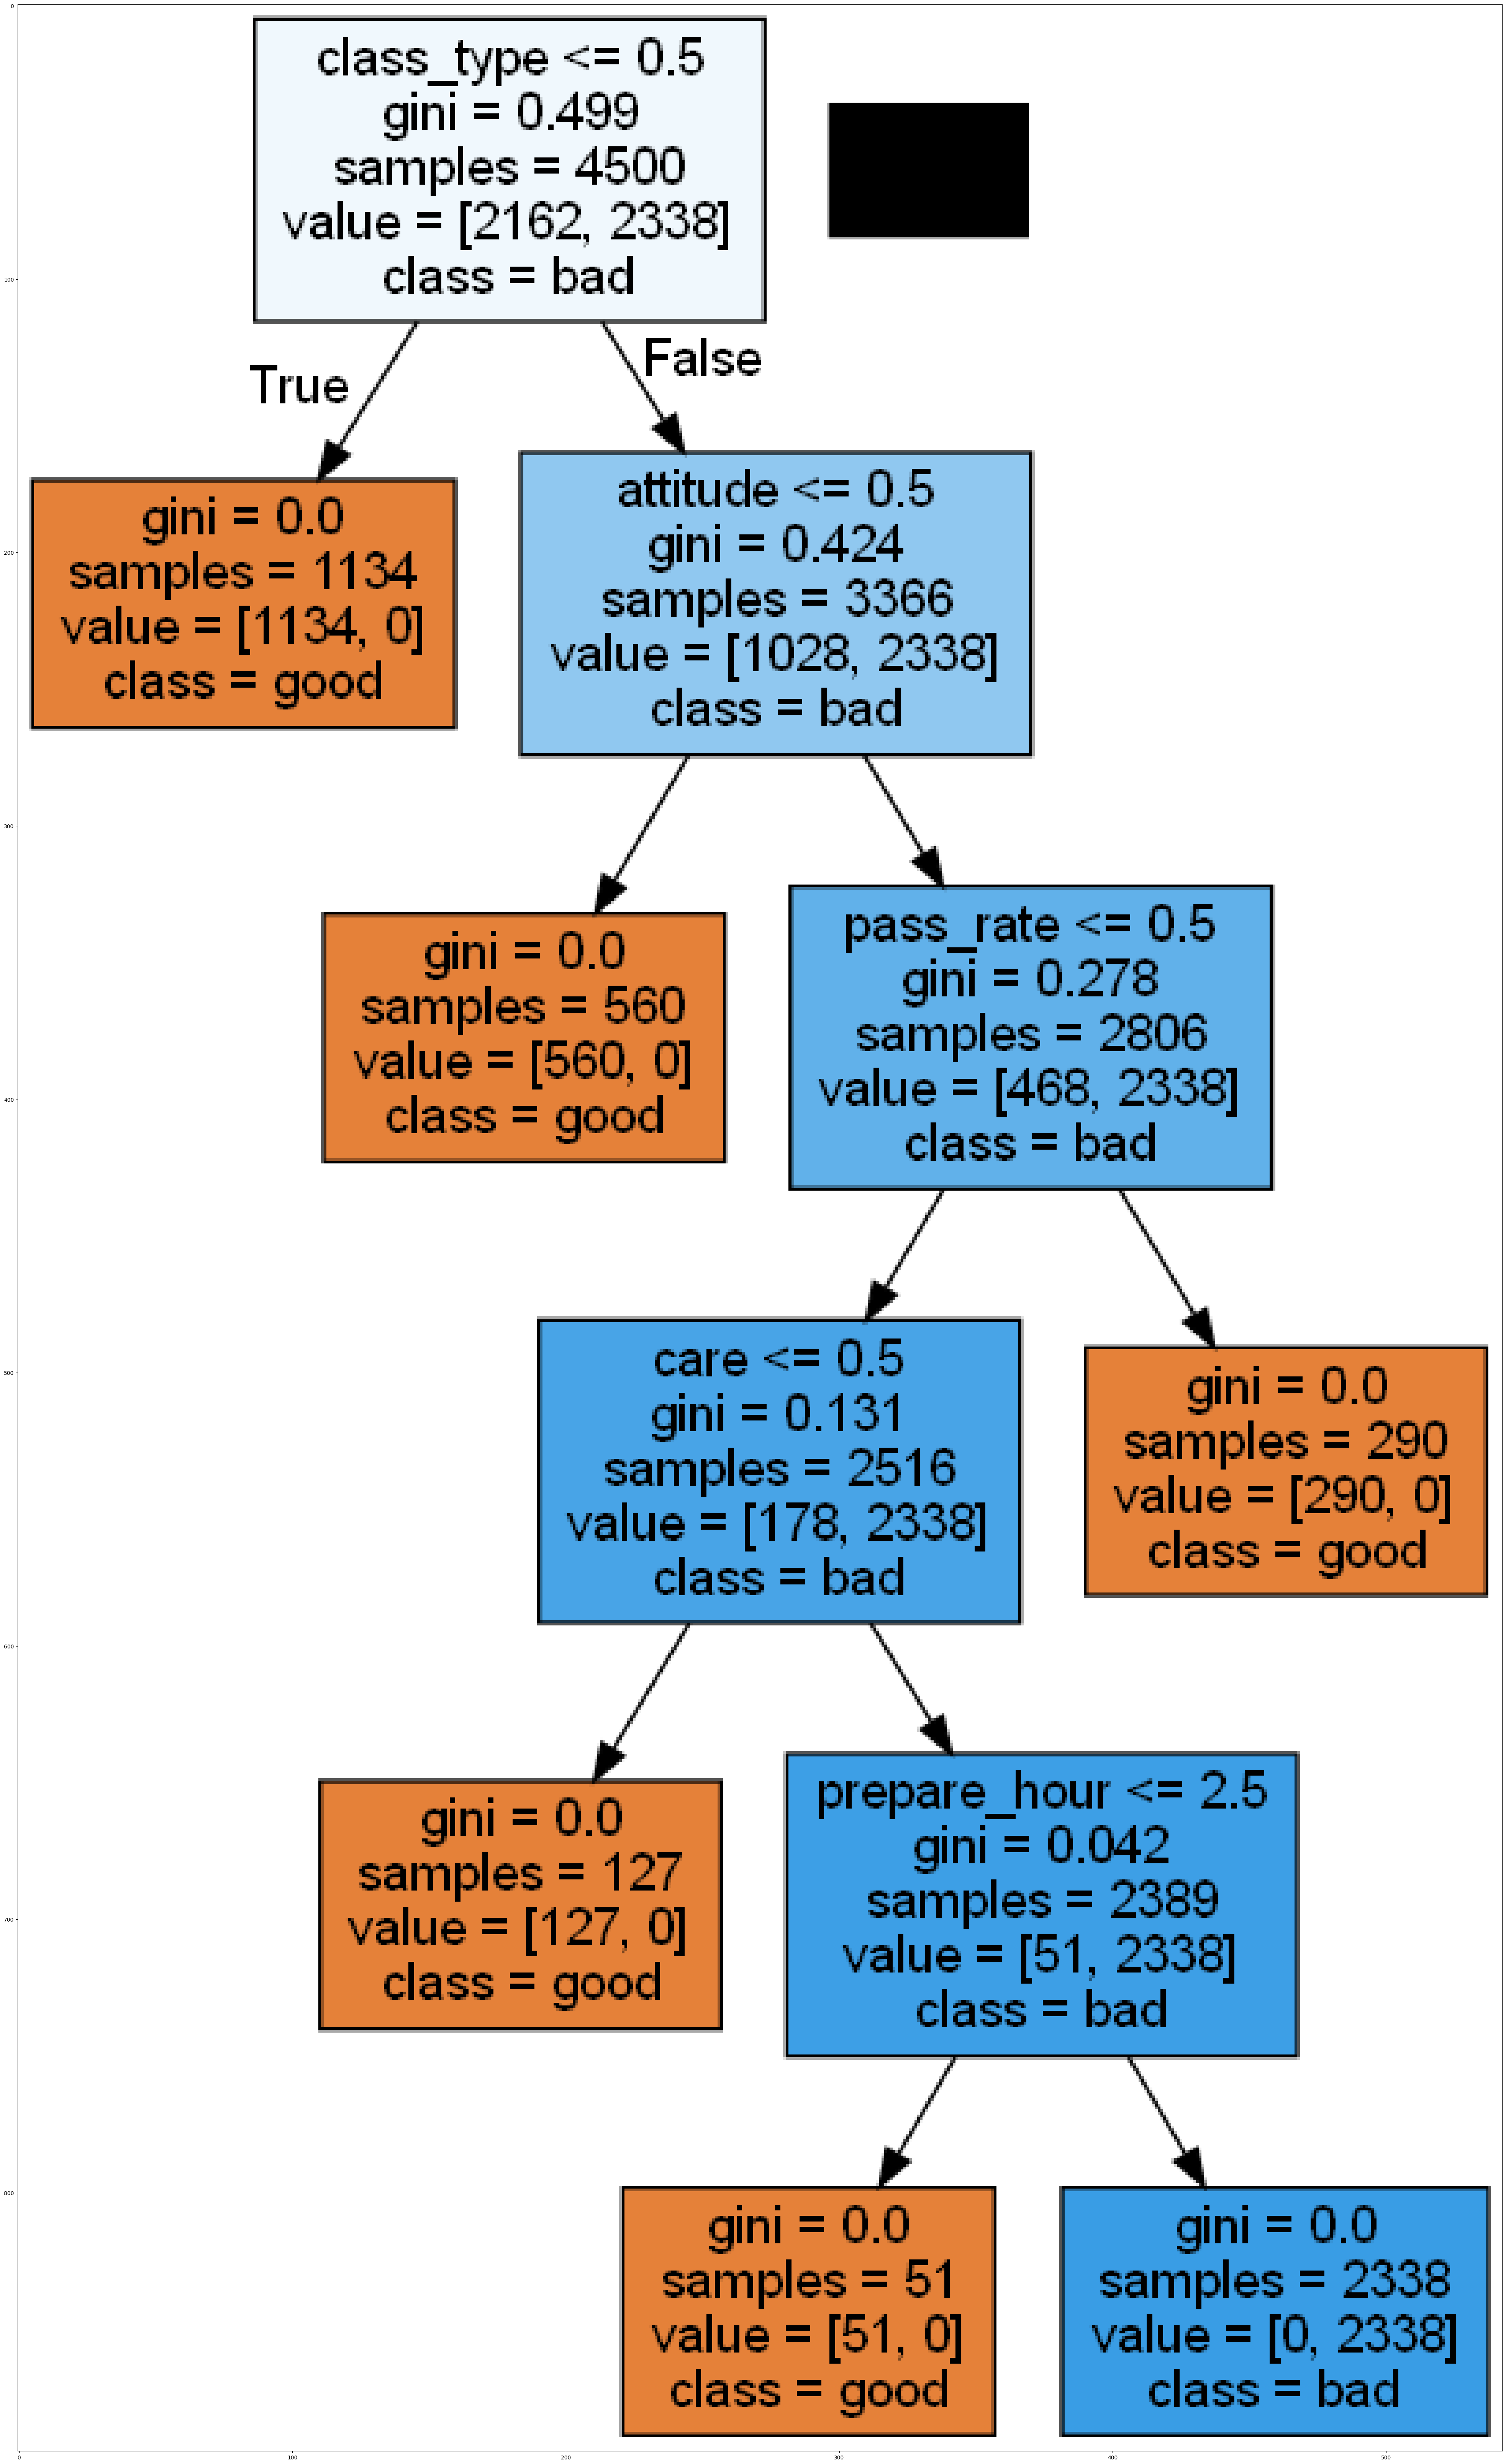

In [19]:
from sklearn import tree
import pydotplus
from io import StringIO
import matplotlib.image as image
filename="Decision.png"
ios = StringIO()
feature=['age','gender','height','weight','attitude','prepare_hour','class_type','pass_rate','glasses','classhw','care']
tree.export_graphviz(DecidionTreeModel,feature_names=feature, out_file=ios, class_names= ['good','bad'], filled=True)
gra = pydotplus.graph_from_dot_data(ios.getvalue())  
gra.write_png(filename)
img = image.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img)


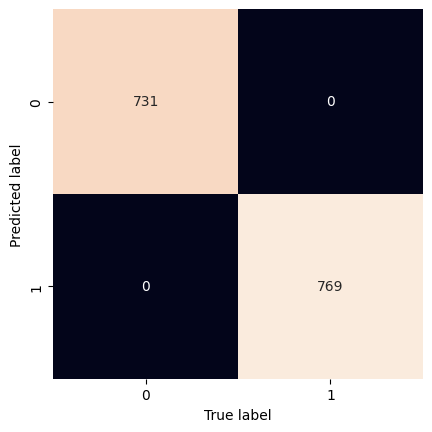

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_prediction = DecidionTreeModel.predict(X_test)
mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0, 1], yticklabels=[0,1])
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

In [21]:
df_alter=pd.read_csv("./teacher_data_alter.csv") #讀csv

label_encoder=LabelEncoder()
df_alter["gender"]=label_encoder.fit_transform(df_alter["gender"]) # 對gender做label Encoder
df_alter["attitude"]=label_encoder.fit_transform(df_alter["attitude"]) # 對attitude做label Encoder
df_alter["class_type"]=label_encoder.fit_transform(df_alter["class_type"]) # 對class_type做label Encoder
df_alter["pass_rate"]=label_encoder.fit_transform(df_alter["pass_rate"]) # 對pass_rate做label Encoder
df_alter["classhw"]=label_encoder.fit_transform(df_alter["classhw"]) # 對classhw做label Encoder
df_alter["care"]=label_encoder.fit_transform(df_alter["care"]) # 對care做label Encoder
df_alter["label"]=label_encoder.fit_transform(df_alter["label"]) # 對label做label Encoder

X_alter=df_alter.drop(labels=["label"],axis=1).values
y_alter=df_alter["label"].values
print("微調後資料集準確率:",DecidionTreeModel.score(X_alter,y_alter)) #使用測試資料預測分類，並印出準確率

微調後資料集準確率: 0.887


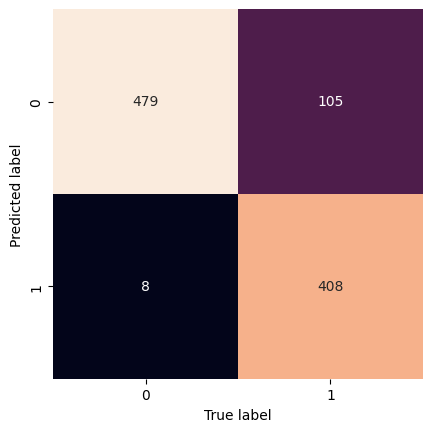

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_prediction_alter = DecidionTreeModel.predict(X_alter)
mat = confusion_matrix(y_alter, y_prediction_alter)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0, 1], yticklabels=[0,1])
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()